In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def tuning_curve(x, A, mean, std):
    return A * np.exp(-(x-mean)**2/(2*std**2))
tuning_curve = np.vectorize(tuning_curve)

## Part A

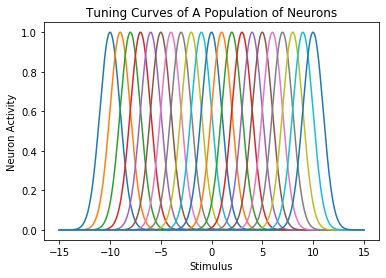

In [3]:
x_range = np.arange(-15,15,0.01)
mean_vector = np.arange(-10,11,1)
STD = 1
A = 1
for mean in mean_vector:
    plt.plot(x_range,tuning_curve(x_range,A,mean,STD))
plt.title('Tuning Curves of A Population of Neurons')
plt.xlabel('Stimulus')
plt.ylabel('Neuron Activity')
plt.show()

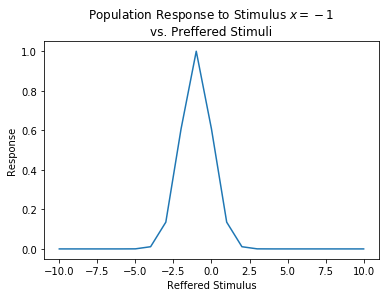

In [4]:
stim = -1
plt.plot(mean_vector, tuning_curve(stim,A,mean_vector,STD))
plt.title('Population Response to Stimulus $x=-1$\nvs. Preffered Stimuli')
plt.xlabel('Reffered Stimulus')
plt.ylabel('Response')
plt.show()

## Part B

In [5]:
def wta_decoder(pref_stim, resp):
    highest = np.argmax(resp)
    return pref_stim[highest]

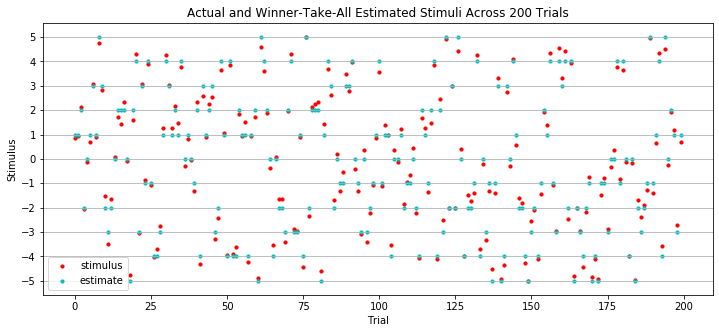

Mean Error in WTA Estimation: 0.250700 
Error standard deviation in WTA Estimation: 0.151514


In [6]:
NUM_TRIAL = 200
stim_interval = np.arange(-5,5.01,0.01)

stim_vector = []
est_stim_vector = []
resp_vector = []
error_vector = []

for trial in range(NUM_TRIAL):
    trial_stim = np.random.choice(stim_interval)
    trial_resp = tuning_curve(trial_stim, A, mean_vector, STD)
    noise = np.random.normal(0,STD/20, len(mean_vector))
    trial_resp += noise
    
    estimated_stim = wta_decoder(mean_vector, trial_resp)
    trial_error = np.abs(trial_stim-estimated_stim)
    
    stim_vector.append(trial_stim)
    est_stim_vector.append(estimated_stim)
    error_vector.append(trial_error)
    resp_vector.append(trial_resp)

plt.figure(figsize=(12,5))
plt.scatter(np.arange(NUM_TRIAL), stim_vector, c='r',s=10)
plt.scatter(np.arange(NUM_TRIAL), est_stim_vector, c='c', s=10)
plt.legend(['stimulus', 'estimate'])
plt.yticks(np.arange(-5,6,1))
plt.grid(axis='y')
plt.xlabel('Trial')
plt.ylabel('Stimulus')
plt.title('Actual and Winner-Take-All Estimated Stimuli Across 200 Trials')
plt.show()

wta_error_mean = np.mean(error_vector)
wta_error_std = np.std(error_vector)
print('Mean Error in WTA Estimation: %f \nError standard deviation in WTA Estimation: %f' % (wta_error_mean,wta_error_std))

## Part C

In [7]:
def ols_error(x, responses, means, A=1, std=1):
    return np.sum((responses - tuning_curve(x,A,means,std))**2)

def MLE_decoder(response, means, A=1, std=1, stim_interval=np.arange(-5,5.01,0.01)):
    errors = []
    for stim in stim_interval:
        errors.append(ols_error(stim, response,means))
    idx = np.argmin(errors)
    return stim_interval[idx]

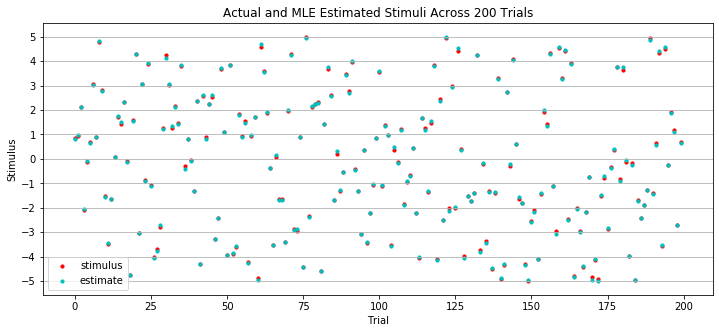

Mean Error in MLE Estimation: 0.040550 
Error standard deviation in MLE Estimation: 0.029431


In [8]:
est_stim_vector_MLE = []
error_vector_MLE = []

for resp,stim in zip(resp_vector,stim_vector):
    estimated_stim = MLE_decoder(resp, mean_vector)
    
    est_stim_vector_MLE.append(estimated_stim)
    error_vector_MLE.aprintppend(np.abs(stim-estimated_stim))

plt.figure(figsize=(12,5))
plt.scatter(np.arange(NUM_TRIAL), stim_vector, c='r',s=10)
plt.scatter(np.arange(NUM_TRIAL), est_stim_vector_MLE, c='c', s=10)
plt.legend(['stimulus', 'estimate'])
plt.yticks(np.arange(-5,6,1))
plt.grid(axis='y')
plt.xlabel('Trial')
plt.ylabel('Stimulus')
plt.title('Actual and MLE Estimated Stimuli Across 200 Trials')
plt.show()

mle_error_mean = np.mean(error_vector_MLE)
mle_error_std = np.std(error_vector_MLE)
print('Mean Error in MLE Estimation: %f \nError standard deviation in MLE Estimation: %f' % (mle_error_mean,mle_error_std))

## Part D

In [9]:
def map_error(x, responses, means, A=1, std=1):
    return np.sum((responses - tuning_curve(x,A,means,std))**2)/(2*(std/20)**2) + x**2/(2*2.5**2)

def MAP_decoder(response, means, A=1, std=1, stim_interval=np.arange(-5,5.01,0.01)):
    errors = []
    for stim in stim_interval:
        errors.append(map_error(stim, response, means))
    idx = np.argmin(errors)
    return stim_interval[idx]

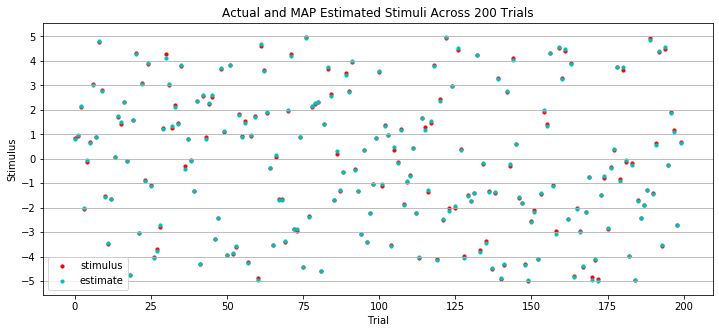

Mean Error in MAP Estimation: 0.040650 
Error standard deviation in MAP Estimation: 0.029582


In [10]:
est_stim_vector_MAP = []
error_vector_MAP = []

for resp,stim in zip(resp_vector,stim_vector):
    estimated_stim = MAP_decoder(resp, mean_vector)
    
    est_stim_vector_MAP.append(estimated_stim)
    error_vector_MAP.append(np.abs(stim-estimated_stim))

plt.figure(figsize=(12,5))
plt.scatter(np.arange(NUM_TRIAL), stim_vector, c='r',s=10)
plt.scatter(np.arange(NUM_TRIAL), est_stim_vector_MAP, c='c', s=10)
plt.legend(['stimulus', 'estimate'])
plt.yticks(np.arange(-5,6,1))
plt.grid(axis='y')
plt.xlabel('Trial')
plt.ylabel('Stimulus')
plt.title('Actual and MAP Estimated Stimuli Across 200 Trials')
plt.show()

map_error_mean = np.mean(error_vector_MAP)
map_error_std = np.std(error_vector_MAP)
print('Mean Error in MAP Estimation: %f \nError standard deviation in MAP Estimation: %f' % (map_error_mean,map_error_std))

## Part E

In [11]:
std_vector = [0.1, 0.2, 0.5, 1, 2, 5]
error_all_trials = []
for trial in tqdm(range(NUM_TRIAL)):
    trial_stim = np.random.choice(stim_interval)
    error_single_trial = []
    for std in std_vector:
        trial_resp = tuning_curve(trial_stim, A, mean_vector, std)
        noise = np.random.normal(0,1/20, len(mean_vector))
        trial_resp += noise
        
        estimated_stim = MLE_decoder(trial_resp, mean_vector)
        error_single_trial.append(np.abs(estimated_stim - trial_stim))
    error_all_trials.append(error_single_trial)
error_all_trials = np.asarray(error_all_trials)
print(error_all_trials.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:29<00:00,  2.24it/s]

(200, 6)


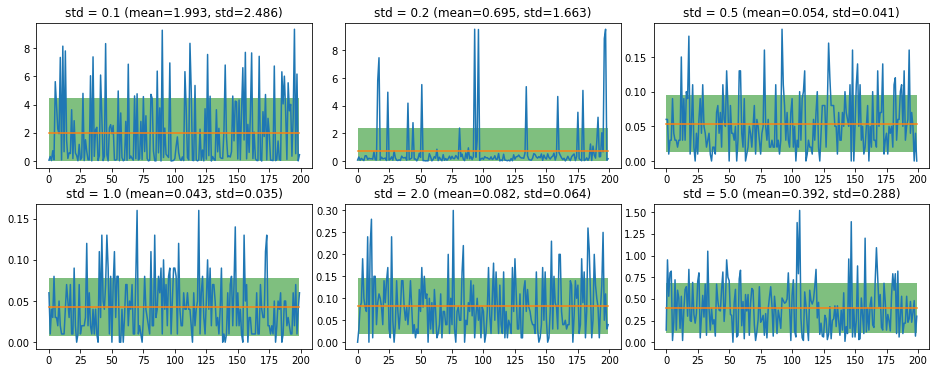

In [12]:
plt.figure(figsize=(16,6))
for i in range(1,7):
    plt.subplot(2,3,i)
    error_vals = error_all_trials[:,i-1]
    plt.plot(np.arange(NUM_TRIAL), error_vals)
    mean = np.mean(error_vals)
    std = np.std(error_vals)
    plt.plot([mean]*NUM_TRIAL)
    plt.fill_between(np.arange(NUM_TRIAL), np.max([mean-std,0]), mean+std, alpha = 0.5,  facecolor='green')
    plt.title('std = %0.1f (mean=%0.3f, std=%0.3f)' % (std_vector[i-1],mean,std))
plt.subplots_adjust(wspace=0.12, hspace=0.25)
plt.show()

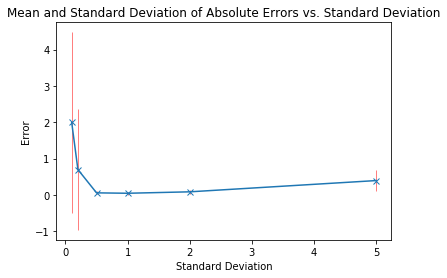

In [13]:
means = np.mean(error_all_trials, axis=0)
stds = np.std(error_all_trials, axis=0)
plt.errorbar(std_vector, means, yerr=stds, marker='x', markerfacecolor='r', ecolor='r', elinewidth=0.5)
plt.title('Mean and Standard Deviation of Absolute Errors vs. Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Error')
plt.show()